<a href="https://colab.research.google.com/github/jhj030722/til/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_week6_%EC%9D%B4%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순차 데이터와 순환 신경망

## 개념

- 순차 데이터란 : 텍스트나 시계열 데이터와 같이 **순서에 의미가 있는 데이터**
- 댓글, 즉 텍스트 데이터를 분석하려면 **단어의 순서**가 중요!!
- 따라서 순차 데이터를 다룰 때는 이전에 입력한 데이터를 **기억하는** 기능이 필요함

< 피드포워드 신경망 >

- 완전 연결 신경망이나 합성곱 신경망은 이러한 기억 장치가 없음
  - 하나의 샘플(또는 배치)을 사용해 정방향 계산을 수행하고 나면, 그 샘플은 버려지고 다음 샘플 처리 시 재사용하지 X
- 이렇게 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 **피드포워드 신경망**이라고 함

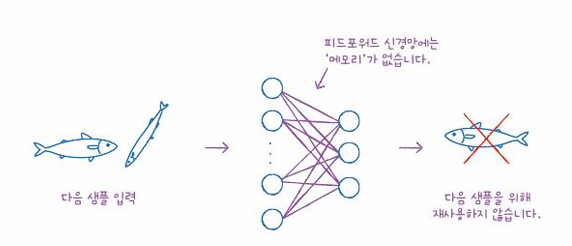

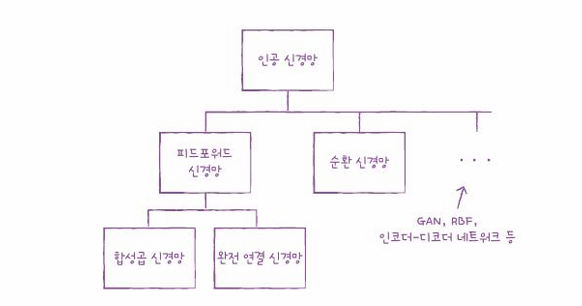

다음 샘플을 처리하는데에 이전 샘플을 재사용하기 위해서는 이렇게 데이터의 흐름이 앞으로만 전달되어서는 X,

다음 샘플을위해서 이전 데이터가 신경망 층에 순환되어야 함
이것이 바로 **순환 신경망**

## 순환 신경망

- 일반적인 완전 연결 신경망과 거의 비슷하나
- **뉴런의 출력이 다시 자기 자신으로 전달되어** 이전 데이터의 처리 흐름을 순환한다.
- 즉 어떤 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용 하는 것.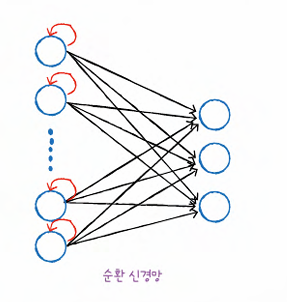

- A,B,C 3개의 샘플을 처리하는 순환 신경망의 뉴런이 있다고 가정해 보자
- O는 출력된 결과이다.
- 첫번째 샘플인 A를 처리하고 난 출력 OA가 다시 뉴런으로 들어간다.

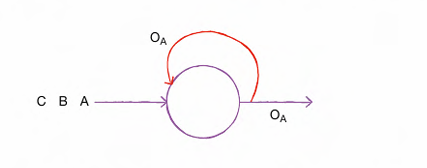

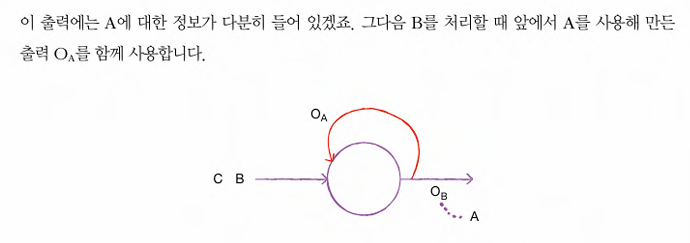

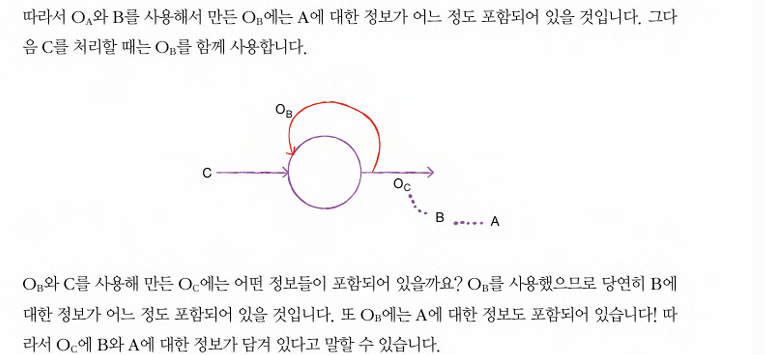

- 순환 신경망에서는 *'이전 샘플에 대한 기억을 가지고있다'* 고 주로 말한다.
- **타임스텝** : 샘플을 처리하는 한 단계
  - 순환 신경망은 이전 Timestep의 샘플을 기억하지만
  - 타임스텝이 오래될 수록 순환되는 정보는 희미해진다.

- **셀(cell)**: 순환신경망에서 '층'을 셀이라고 부름
  - 한 cell에는 여러 개의 뉴런이 있지만, 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 **하나의 셀로 층을 표현함**
  - **은닉 상태(hidden state)** : 셀의 출력을 의미

- 모든 신경망은 기본 구조가 같음: 입력에 어떤 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 보내는 것
  - 달라지는 것은 **층의 출력(hidden state)를 다음 timestep에 재사용한다는 것**
  

- 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트 함수인 *tanh* 가 많이 사용된다.
  - sigmoid 함수와 비슷한 s자 모양이지만, 시그모이드 함수와는 달리 **-1 ~ 1 사이의 범위** 를 가짐



- 순환 신경망에서도 피드포워드 신경망과 동일하게 뉴런은 입력과 가중치를 곱함
  - 다만 순환 신경망의 뉴런은 **가중치가 하나 더 있음**
  - 이전 timestep의 은닉 상태에 곱해지는 가중치임
  - cell은 입력과 이전 타임스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만듬

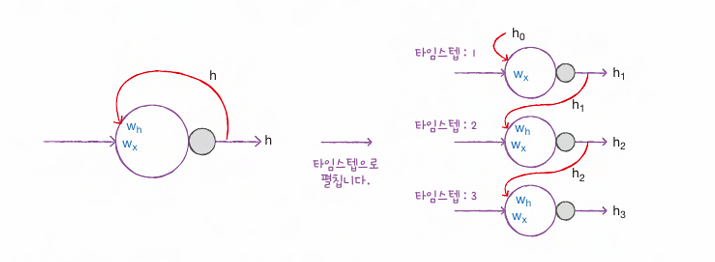

- Wx는 입력에 곱해지는 가중치
- Wh는 이전 타임스텝의 은닉상태에 곱해지는 가중치

---



---

[1] 타임스텝 1에서 셀의 출력 h1이 타임스텝 2의 셀로 주입됨. 이때 Wb와 곱해짐

[2] 타임스텝 2에서의 출력 h2가 타입스텝 3의 셀로 주입됨. 이때에도 Wb와 곱해짐


▶ 모든 타임스텝에서 사용되는 가중치는 Wb 하나임!! 이 가중치는 타임스텝에 따라 변화되는 뉴런의 출력을 학습함

▶ 타임스텝 1에서 사용되는 이전 은닉상태 h0은 어떻게 구하나 ? => 맨 처음 샘플을 입력할 때는 이전 타임스텝이 없음. 따라서 h0은 모두 0으로 초기화함

## 셀의 가중치와 입출력

- 순환 신경망의 셀에서 필요한 가중치 크기 계산하기.
- 다음 그림처럼 순환층에 입력되는 특성의 개수가 4개, 순환층의 뉴런이 3개라고 가정

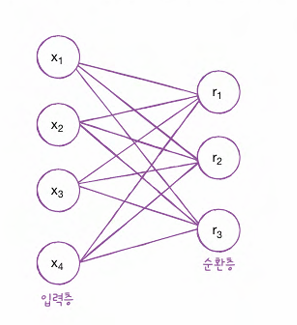

- Wx의 크기를 구해보자.
- 입력층과 순환층의 뉴런이 모두 완전 연결되기 때문에 Wx의 크기는 4*3=12 가 됨

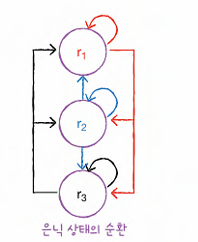

- **순환층에서 다음 타임스탭에 사용되는 은닉상태를 위한 가중치 Wh의 크기는?**

- 순환층에 있는 첫 뉴런 r1의 은닉 상태가 다음 타임스텝에 재사용될 때, 첫번째 뉴런과 두 번째, 세 번째 뉴런에  모두 전달됨 *(붉은 화살표)*

- 이전 타임스텝의 은닉 상태는 다음 타임스텝의 뉴런에 완전히 연결됨

- 두 번째 뉴런 r2의 은닉 상태도 마찬가지로 첫, 두 세번째 뉴런에 모두 전달됨 *(파란 화살표)*

- 세 번째 뉴런 r3의 은닉 상태도 마찬가지다 *(검은 화살표)*

- 따라서 이 순환층에서 은닉 상태를 위한 가중치 Wh는 3*3=9 개이다.



< 모델 파라미터 개수 계산 >

- 가중치 + 절편
 - 각 뉴런마다 하나의 절편이 있음
 - 따라서 이 순환 층은 12 + 9 + 3 = 24개의 모델 파라미터를 가지고 있음
 - *모델 파라미터 수 = Wx + Wh + 절편 = 24*

< 순환층의 입력과 출력 >

- 합성곱 층의 입력은 전형적으로 하나의 샘플이 너비, 높ㅇ피, 채널이라는 3개의 차원을 가짐
- **순환층**은 일반적으로 **샘플마다 2개의 차원**을 가짐.
  - 하나의 샘플을 하나의 **시퀀스 sequence** 라고 함.
  - 이 시퀀스의 길이 = 타임스텝의 길이


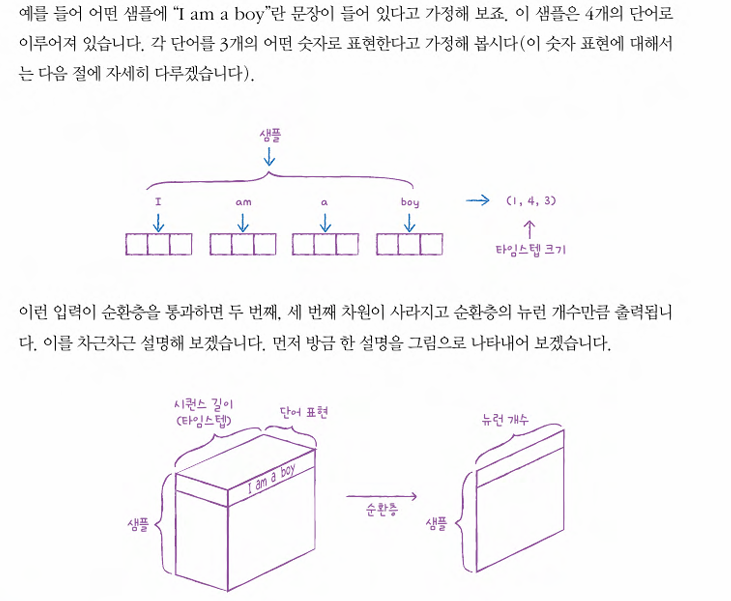

- 1개의 샘플은 시퀀스 길이(= 단어 개수)와 단어 표현의 2차원 배열이다.
- 이것이 순환층을 통과하면 1차원 배열로 바뀜
  - 이 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정

- 앞에서는 cell이 모든 타임스텝에서 출력을 만든 것처럼 표현했으나, 사실 **순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보냄**
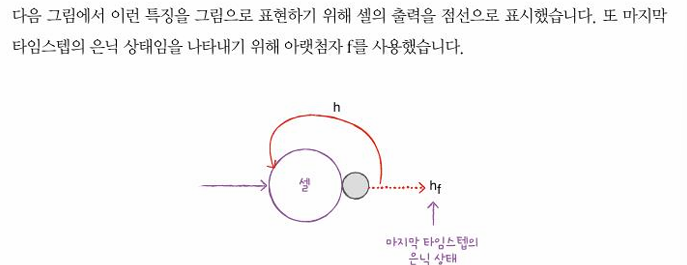

- 이는 마치 입력된 시퀀스 길이를 모두 읽어서 정보를 마지막 은닉 상태에 압축하여 전달하는 것처럼 볼 수 잇음
  - 이제 순환 신경망이 정보를 기억하는 *메모리를 가진다*고 표현하는지 이해할 수 있다.



---



---



< 순환 층을 여러 개 쌓앗을 대 셀의 출력 >

- 셀의 입력: 샘플마다 timestep과 단어 표현으로 이루어진 2차원 배열이어야 하므로, 첫 번째 셀이 마지막 타임스텝의 은닉 상태만 출력해서는 안됨!
-이런 경우에는 **마지막 셀을 제외한 다른 모든 셀은 all 타임스텝의 은닉 상태를 출력함**
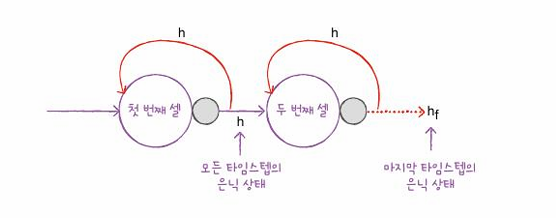


☞ 첫번째 셀은 모든 타임스텝의 은닉 상태를 출력하고, 두 번째 셀은 마지막 타임스텝의 은닉 상태만 출력한다.

< 출력층의 구성 >

- 순환 신경망도 CNN과 마찬가지로 마지막엔 *밀집층*을 두어 클래스를 분류함.
  - **합성곱 신경망과 다른 점은, 마지막 셀의 출력이 순차 신경망은 1차원이기 때문에 Flatten 클래스로 펼칠 필요가 없음**
- 다중 분류: 츨력층에 클래스 개수만큼 뉴런을 두고 SOFTMAX 활성화함수
- 이진 분류: 하나의 뉴런을 두고 SIGMOID 활성화함수
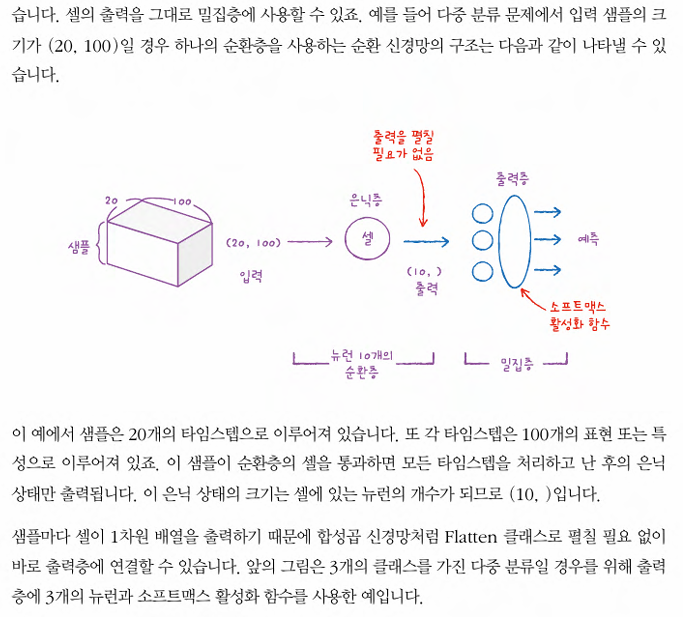
